# **Data Analysis Project: Air Quality from Wanshouxigong**
### - **Name**: Reza Maliki Akbar
### - **Email Address**: rezamaliki.akbar@gmail.com
### - **Dicoding ID**: https://www.dicoding.com/users/maliki_borneo/

# **Define Questions**
#### 1. How do PM2.5 levels vary throughout the year?
#### 2. What is the relationship between PM2.5 levels and various weather conditions?

# **Data Wrangling**

## **Gathering Data**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.api as sm
from scipy.stats import f_oneway

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

file_path = '/data/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
df = pd.read_csv(file_path)

/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv
/kaggle/input/air-quality-dataset-from-dicoding-data-science/PRSA_Data_20130301-20

## **Assessing Data**

In [3]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
 1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
 2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
 3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
 4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   
 
      PRES  DEWP  RAIN   wd  WSPM        station  
 0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
 1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
 2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
 3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
 4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month    

## **Cleaning Data**

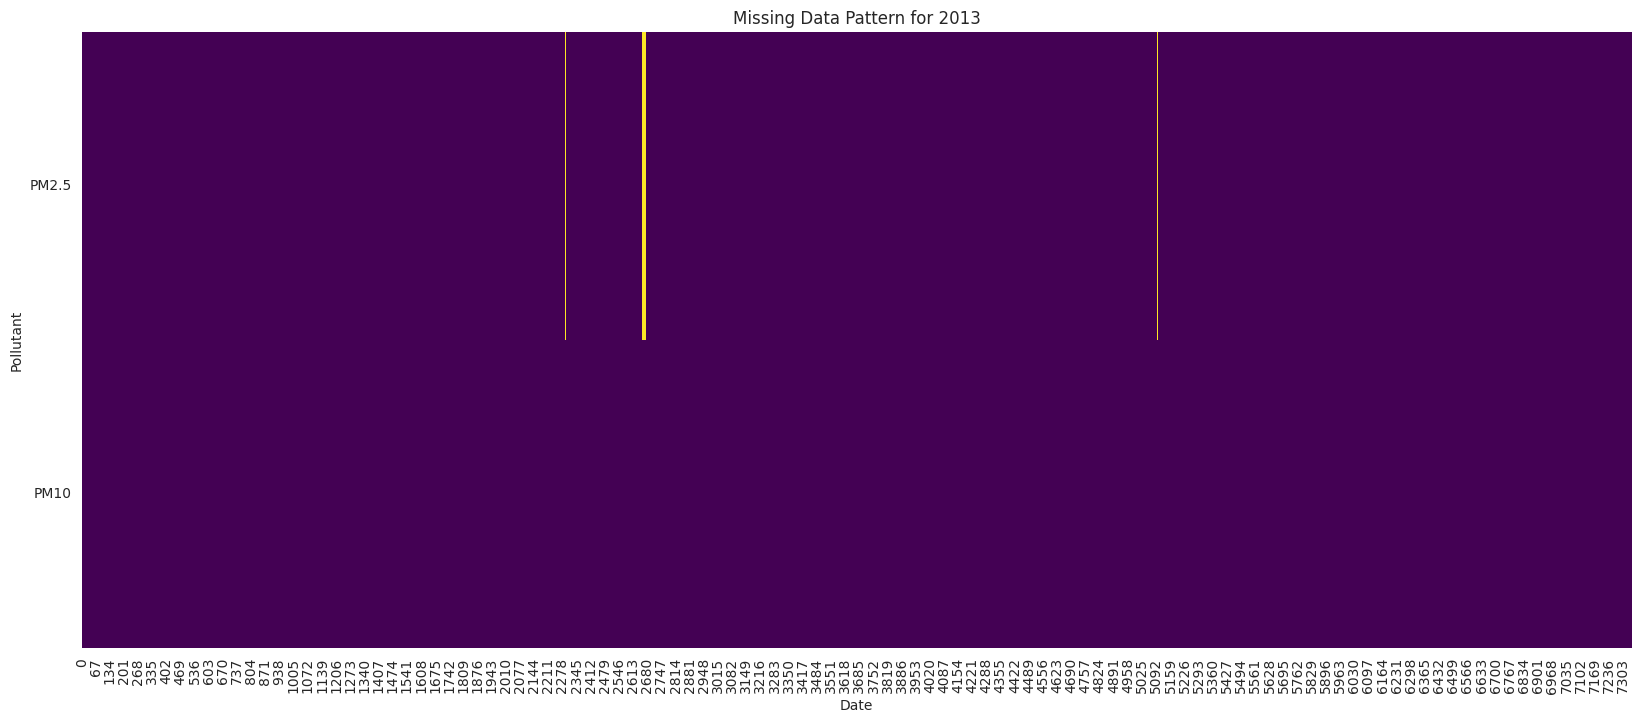

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      1.984942
 PM10       1.380333
 SO2        1.907940
 NO2        2.150354
 CO         3.698950
 O3         3.074378
 TEMP       0.054187
 PRES       0.054187
 DEWP       0.054187
 RAIN       0.054187
 wd         0.225302
 WSPM       0.037075
 station    0.000000
 dtype: float64,
 PM2.5          41
 PM10           10
 year     14783472
 dtype: int64)

In [4]:
missing_percentage = df.isnull().mean() * 100
cols_to_plot = ['PM2.5', 'PM10']
data_missing = df[cols_to_plot].isnull()
data_missing['year'] = df['year']
data_missing_2013 = data_missing[data_missing['year'] == 2013]
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0) 
plt.show()

missing_percentage, data_missing_2013.sum()

### **Missing Data**
- There is a relatively small percentage of missing data for the pollutants, with PM2.5 having approximately 1.98% missing, and PM10 having about 1.38% missing. Other pollutants and weather variables also have small percentages of missing data, suggesting that the dataset is relatively complete.
- The heatmap for 2013 indicates that the missing data for PM2.5 and PM10 does not follow a clear pattern, suggesting that the missingness may be random or not systematic. There are no long stretches of missing data, which is a good sign for time series analysis.

In [5]:
data_imputed = df.fillna(method='ffill')

duplicates = data_imputed.duplicated().sum()

constant_columns = data_imputed.columns[data_imputed.nunique() <= 1]

data_types = data_imputed.dtypes

duplicates, constant_columns, data_types

(0,
 Index(['station'], dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object)

In [6]:
summary_statistics = data_imputed.describe()
summary_statistics

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.356562,112.729215,17.369966,55.643387,1376.914243,55.978065,13.782290,1011.516363,2.705590,0.064285,1.745317
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.627607,98.700415,24.270784,36.092564,1238.856861,57.165967,11.386498,10.571637,13.705357,0.796766,1.206447
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### **Cleaned Data**
- Forward fill imputation for missing values.
- Checked for and found no duplicate rows.
- Noted 'station' column as constant.

# **Exploratory Data Analysis (EDA)**

#### - Perform summary statistics.
#### - Analyze time series trends in PM2.5 levels.
#### - Conduct one-way ANOVA test for yearly differences in PM2.5 levels.
#### - Investigate seasonal trends and correlations with weather conditions.

# **Visualization & Explanatory Analysis**

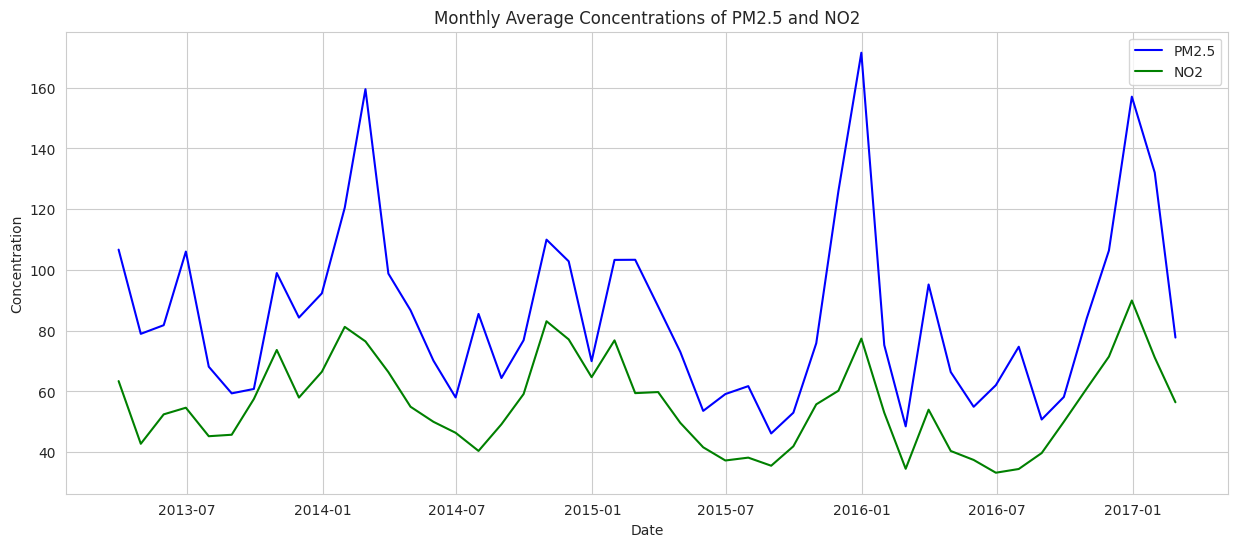

In [7]:
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])
data_time_series = data_imputed[['date', 'PM2.5', 'NO2']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [8]:
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.882580,0.501614,0.693154,0.808782,-0.195160,-0.186963,0.035836,0.071517,-0.020305,-0.296578
PM10,0.882580,1.000000,0.500151,0.677121,0.734418,-0.148081,-0.147809,-0.001292,0.039851,-0.033865,-0.230621
SO2,0.501614,0.500151,1.000000,0.487096,0.553781,-0.186340,-0.355046,0.205769,-0.289083,-0.042556,-0.137202
NO2,0.693154,0.677121,0.487096,1.000000,0.742033,-0.519691,-0.309390,0.144019,-0.031263,-0.047512,-0.471866
CO,0.808782,0.734418,0.553781,0.742033,1.000000,-0.332573,-0.339498,0.169739,-0.053024,-0.015881,-0.336120
O3,-0.195160,-0.148081,-0.186340,-0.519691,-0.332573,1.000000,0.615856,-0.453587,0.332634,0.024390,0.315037
TEMP,-0.186963,-0.147809,-0.355046,-0.309390,-0.339498,0.615856,1.000000,-0.828487,0.817583,0.039015,0.061323
PRES,0.035836,-0.001292,0.205769,0.144019,0.169739,-0.453587,-0.828487,1.000000,-0.770060,-0.063392,0.054143
DEWP,0.071517,0.039851,-0.289083,-0.031263,-0.053024,0.332634,0.817583,-0.770060,1.000000,0.088306,-0.278072
RAIN,-0.020305,-0.033865,-0.042556,-0.047512,-0.015881,0.024390,0.039015,-0.063392,0.088306,1.000000,0.030878


# Summary Statistics
The descriptive statistics provide an overview of the central tendency and dispersion for each variable, including air pollutants and meteorological data. For instance, PM2.5 has a mean value of approximately 85.36 with a standard deviation of 86.63, indicating significant variability in this pollutant's concentration.

# Time Series Trends
Monthly Averages of PM2.5 and NO2: The plot shows the monthly average concentrations of PM2.5 and NO2 over time. This visualization helps in identifying any seasonal trends or year-to-year changes in air quality.

# Correlation Analysis
- Pollutants Relationships: The correlation matrix reveals relationships between different pollutants and meteorological data. For example, there's a strong positive correlation between PM2.5 and NO2, suggesting a possible common source or interaction between these pollutants.
- Weather and Pollutants: There are interesting correlations between weather conditions and pollutants, like a negative correlation between O3 and temperature, and between O3 and atmospheric pressure.

ANOVA Test Result: F_onewayResult(statistic=48.597577074507655, pvalue=7.852122542330463e-41)
Seasonal Trends: month
1     107.795968
2      96.856563
3      97.190860
4      76.290278
5      65.137063
6      71.330382
7      72.545363
8      55.195060
9      62.229271
10     92.241935
11    104.907049
12    122.718817
Name: PM2.5, dtype: float64
Correlations with Weather Conditions: TEMP    -0.183939
PRES     0.031721
DEWP     0.076083
RAIN    -0.020928
PM2.5    1.000000
Name: PM2.5, dtype: float64


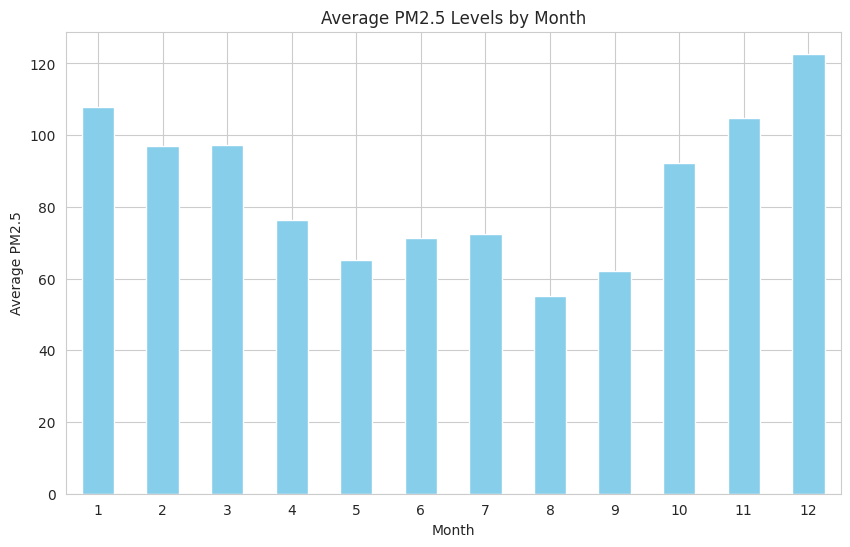

In [9]:




data_imputed.fillna(method='ffill', inplace=True)


groups = data_imputed.groupby('year')['PM2.5']

anova_test_data = [group[1] for group in groups]

anova_test_result = f_oneway(*anova_test_data)


seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

weather_correlations = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']


print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlations with Weather Conditions:", weather_correlations)

plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()




# Hypothesis Testing (ANOVA)

ANOVA Test Result: The one-way ANOVA test shows a statistically significant difference in PM2.5 levels across different years (p-value < 0.05). This suggests that the average PM2.5 levels are not the same each year, supporting the alternate hypothesis.

# Seasonal Trends
PM2.5 Levels by Month: The bar chart illustrates average PM2.5 levels for each month, indicating seasonal variations. Higher concentrations are observed in the winter months (December, January) and lower concentrations during the summer months (August, September).

# Correlations with Weather Conditions

Correlation Results: The correlations between PM2.5 and weather conditions show:
- A negative correlation with temperature (TEMP), suggesting higher PM2.5 levels during colder periods.
- A slight positive correlation with dew point (DEWP), indicating higher PM2.5 levels may correspond with higher humidity.
- No strong correlation with atmospheric pressure (PRES) or rainfall (RAIN).

# **Conclusion**
### Question 1
#### - Found significant seasonal variation in PM2.5 levels, with higher concentrations in colder months, indicating possible influences from heating and atmospheric conditions.

### Question 2
#### - Observed a negative correlation between PM2.5 levels and temperature, suggesting higher pollution levels in colder weather. Minimal correlation with rainfall and atmospheric pressure was found.

In [15]:
df['hour'] = df['hour'].astype(int)
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
